<a href="https://colab.research.google.com/github/saima8/Data-Science-from-scratch/blob/main/Employee_Attrition_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import all nedded file
import numpy as np # linear algebra
import pandas as pd# data analysis and manipulation
import os # assign path
import matplotlib.pyplot as plt# data visualization 
import seaborn as sns #data visualization & heatmap creation

In [13]:
train_data = pd.read_csv('/content/employee_attrition_train.csv')

In [14]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [23]:
# find duplicate value
train_data.duplicated().sum()

0

In [24]:
train_data.shape

(1029, 35)

In [25]:
train_data.dtypes.value_counts()

int64      23
object      9
float64     3
dtype: int64

In [26]:
train_data['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [27]:
import plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [28]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=train_data['Attrition'], values=train_data['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [29]:
train_data.isnull().sum().sum()

268

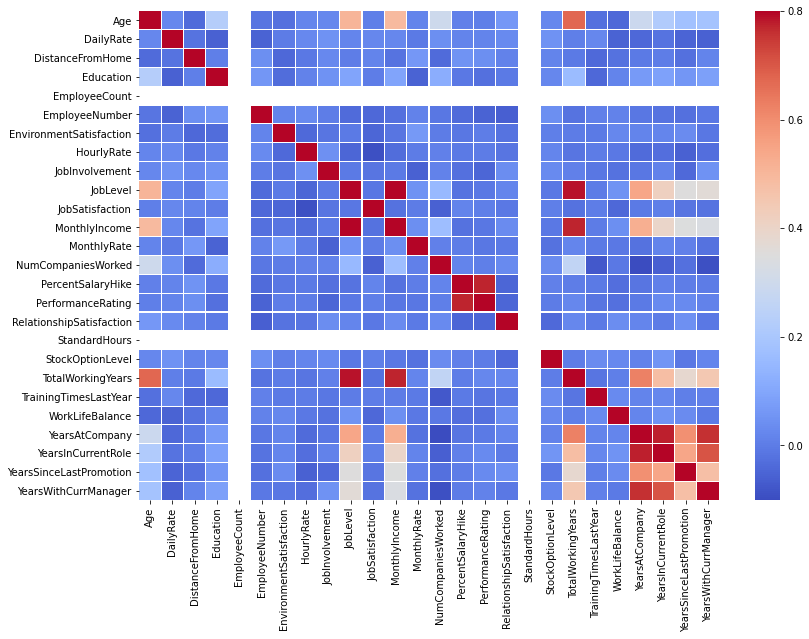

In [30]:
plt.figure(figsize=(13,9))
sns.heatmap(train_data.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [31]:
categorical_features = train_data.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [32]:
train_data[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,Y,No
2,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,Y,No
3,No,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,Y,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No


In [33]:
train_data['BusinessTravel'].value_counts()

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

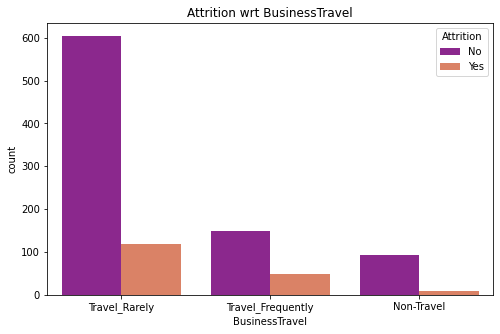

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=train_data, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [35]:
fig = px.histogram(train_data, x='BusinessTravel', color='Attrition', barmode="group",
            width=650,height=390)
fig.show()

In [36]:
train_data['Department'].value_counts()

Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64

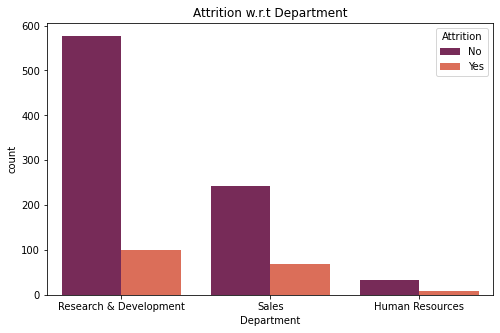

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=train_data, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [38]:
train_data['EducationField'].value_counts()

Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64

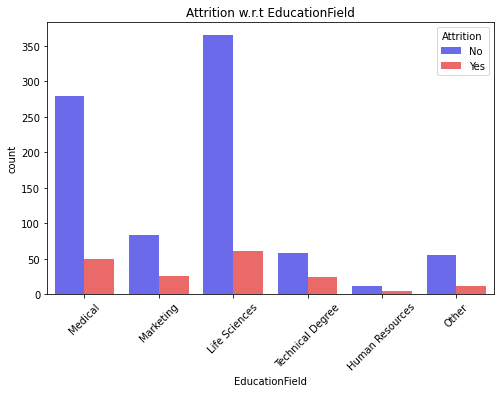

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=train_data, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [40]:
train_data['Gender'].value_counts()

Male      617
Female    412
Name: Gender, dtype: int64

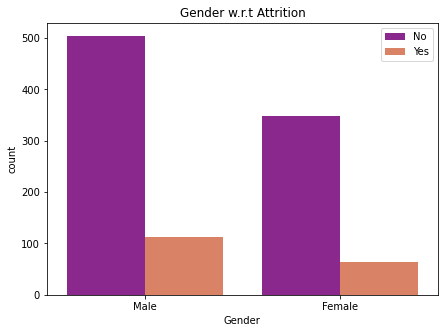

In [41]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=train_data, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [42]:
pd.crosstab(train_data['MaritalStatus'],train_data['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,79,151
Married,196,278
Single,134,186


In [43]:
#JobRole
train_data['JobRole'].nunique()

9

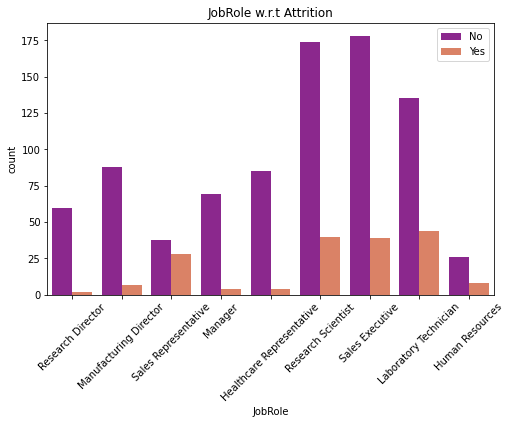

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=train_data, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [45]:
train_data['OverTime'].value_counts()

No     731
Yes    298
Name: OverTime, dtype: int64

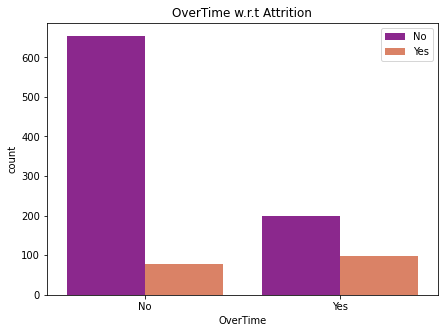

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=train_data, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [47]:
pd.crosstab(train_data['OverTime'], train_data['Gender'])

Gender,Female,Male
OverTime,,
No,286,445
Yes,126,172


In [48]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [49]:
train_data[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1126.0,1.0,2,1,997,4,66,3,4,4,17399,6615,9,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,216.0,6.0,2,1,178,2,84,3,2,2,4941,2819,6,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,337.0,7.0,1,1,1780,2,31,3,1,2,2679,4567,1,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,1246.0,NaN,3,1,644,1,99,3,5,2,18200,7999,1,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,994.0,7.0,4,1,1118,2,87,3,3,2,10445,15322,7,19,3,4,80,0,18,4,3,8,6,4,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



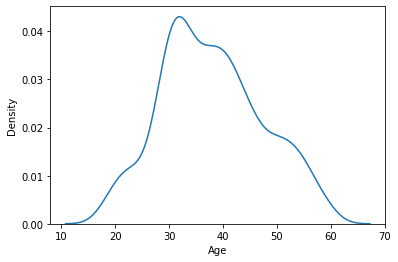

In [50]:
sns.distplot(train_data['Age'],hist=False)
plt.show()

In [51]:
train_data['Age'].nunique()

39

In [52]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
train_data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,4,3,4,4,3,2
1,2,2,3,2,4,4,3
2,1,2,3,2,3,2,3
3,3,1,3,2,3,3,3
4,4,2,3,2,3,4,3


In [53]:
train_data['Education'].value_counts()

3    386
4    279
2    194
1    134
5     36
Name: Education, dtype: int64

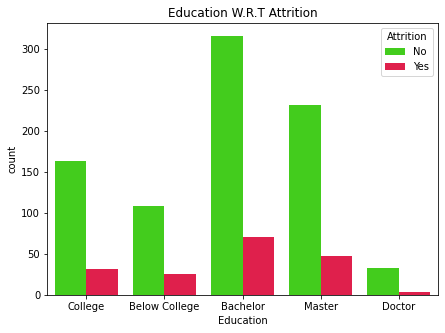

In [56]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=train_data['Education'].map(edu_map), hue='Attrition', data=train_data, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [57]:
train_data['EnvironmentSatisfaction'].value_counts()

3    310
4    300
2    212
1    207
Name: EnvironmentSatisfaction, dtype: int64

In [58]:
train_data['JobInvolvement'].value_counts()

3    606
2    269
4     94
1     60
Name: JobInvolvement, dtype: int64

In [59]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [60]:
train_data[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1126.0,1.0,1,997,66,4,17399,6615,9,22,80,1,32,1,5,4,1,3
1,36.0,216.0,6.0,1,178,84,2,4941,2819,6,20,80,2,7,0,3,2,0,1
2,21.0,337.0,7.0,1,1780,31,1,2679,4567,1,13,80,0,1,3,1,0,1,0
3,50.0,1246.0,NaN,1,644,99,5,18200,7999,1,11,80,1,32,2,32,5,10,7
4,52.0,994.0,7.0,1,1118,87,3,10445,15322,7,19,80,0,18,4,8,6,4,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



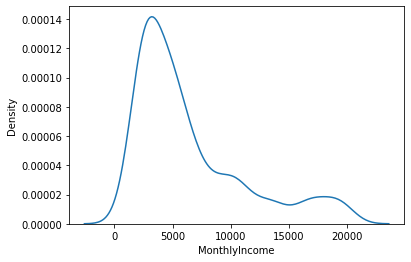

In [61]:
sns.distplot(train_data['MonthlyIncome'],hist=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



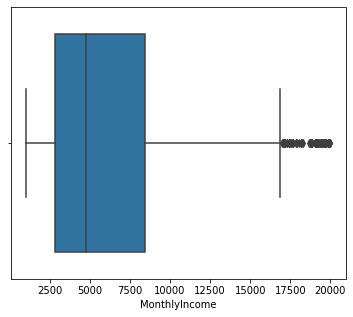

In [62]:
plt.figure(figsize=(6,5))
sns.boxplot(train_data['MonthlyIncome'])
plt.show()

In [63]:
train_data.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
29.0    49
34.0    48
36.0    48
31.0    47
30.0    42
Name: EmployeeCount, dtype: int64

In [64]:
train_data['JobLevel'].value_counts()

1    403
2    350
3    151
4     78
5     47
Name: JobLevel, dtype: int64

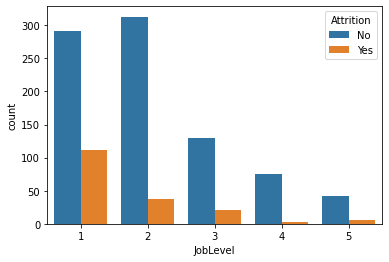

In [65]:
sns.countplot(x='JobLevel',hue='Attrition',data=train_data)
plt.show()

In [66]:
train_data['StockOptionLevel'].value_counts()

0    432
1    417
2    111
3     69
Name: StockOptionLevel, dtype: int64

In [68]:
#drop the columns which are unrelevant for Attrition prediction. 
train_data.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

In [69]:
# Categorical Encoding
train_data[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,Y,No
2,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,Y,No
3,No,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,Y,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No


In [ ]:
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})